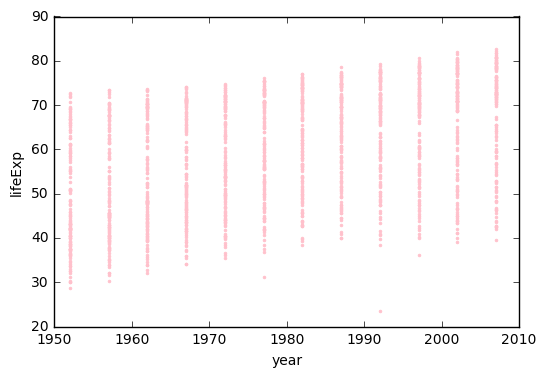

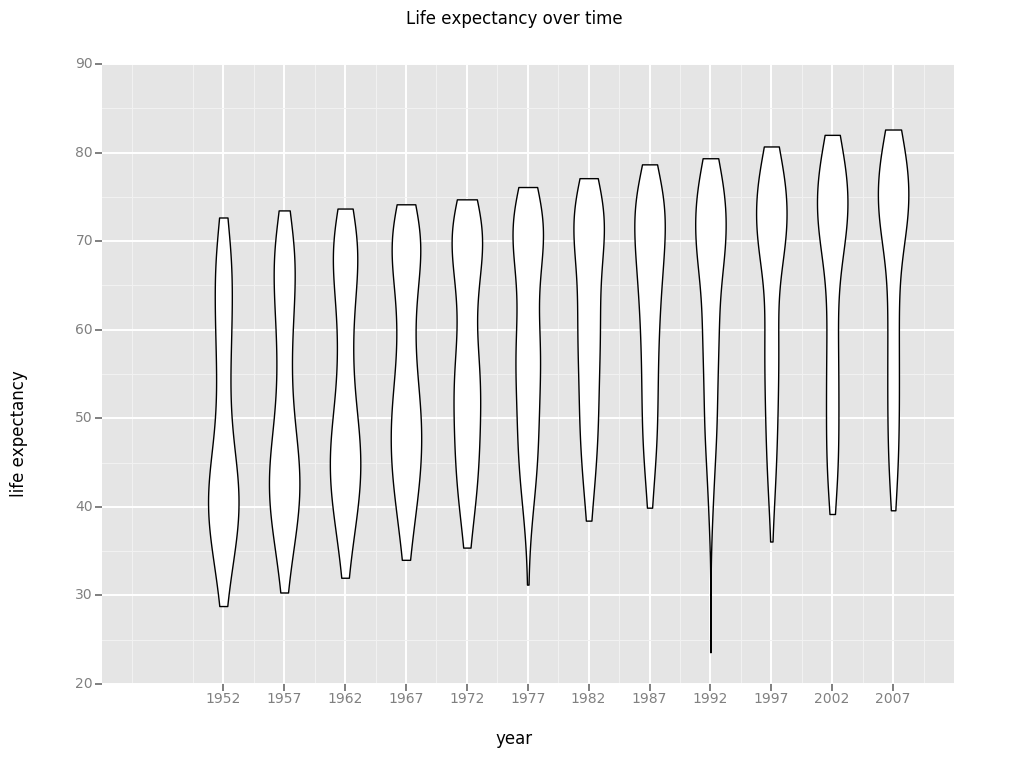

<ggplot: (-9223371953326344248)>


In [7]:
#Nicole Hwang
#Partner : David Hagen
#112069797
import statsmodels.formula.api as sm
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from ggplot import *
import sklearn
from sklearn.linear_model import LinearRegression

## Exercise 1
data = pd.read_csv("08_gap-every-five-years.tsv", sep='\t')
data.index += 1

fig, ax = plt.subplots()
ax.set_ylabel('lifeExp')
ax.set_xlabel('year')
ax.plot(data.year,data.lifeExp, marker='.', linestyle ='None', markersize=4, color ='pink')
    
plt.show()
plt.close('all')

## Question 1 
#From the below scatter plot of the data, we can see a clear increasing trend as time goes on.
#There are some outliers that are way at the bottom, but the general trend is still definitely increasing.

g = ggplot(aes(x='year', y='lifeExp'), data=data) +\
    geom_violin() +\
    labs(title="Life expectancy over time",
         x = "year",
         y = "life expectancy")
print(g)

## Question 2
#The violin plot shows that for the earlier data points has a clear skew for the lower end life expectancies. 
#As time goes on, the "bulge" moves up until it is fully at the upper end of the life expectancies. 
#Early on it is also a little bimodal, with a smaller bump at the upper end, but by the mid 80s, it becomes more unimodal.
#The data is also never truly symmetrical, as there's always a skwq of varying degree.

## Question 3
#We would reject the null hypothese since there is a very clear increase over time and it appears to be large enough 
#to be statistically signigicant which we can assume the relation or corelation. 

## Question 4
#It would have a more extreme shape than the regression. The earlier years are quite bottom heavy so the violins
#would have an even bigger bulge toward the bottom while the later years would have a bigger bulge toward the top.
#It would also be more spread out in the early years and then a bit more compressed later because there's a 
#bigger difference between the max and min early on compared to later.

## Question 5
#The violin plot dhould look like relatively tight "bumps" with fairly short tails.
#Almost like ovals rather than the violin shapes. Over time the ovals would move up alone the y-axix.

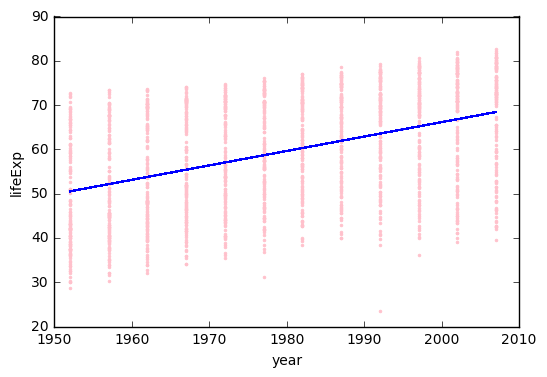

                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     398.6
Date:                Sat, 22 Apr 2017   Prob (F-statistic):           7.55e-80
Time:                        20:00:02   Log-Likelihood:                -6597.9
No. Observations:                1704   AIC:                         1.320e+04
Df Residuals:                    1702   BIC:                         1.321e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   -585.6522     32.314    -18.124      0.0

In [8]:
## Exercise 2

x = data.year
y = data.lifeExp
x = x.values.reshape(-1,1)
y = y.values.reshape(-1,1)

lm = LinearRegression()
lm.fit(x,y )
fig, ax1 = plt.subplots()
ax1.set_ylabel('lifeExp')
ax1.set_xlabel('year')
ax1.plot(x,y, color='pink', marker = '.',linestyle = 'None', markersize='4')
ax1.plot(data.year, lm.predict(x), color = 'blue', markersize='4')
plt.show()
plt.close('all')

mod = sm.ols('lifeExp ~ (year)', data=data).fit()
print(mod.summary())



## Question 6
print('Coefficients:',lm.coef_[0][0])
#~.325 year life expectancy increase/year
## Question 7
# We do, an increase of ~.325/year is sigificant and more than I would've expected. There is a very clear
#increasing  (positive) relationship between life expectancy over time. If there were no relationship, I would've expected
#to see an almost flat regresiion line.

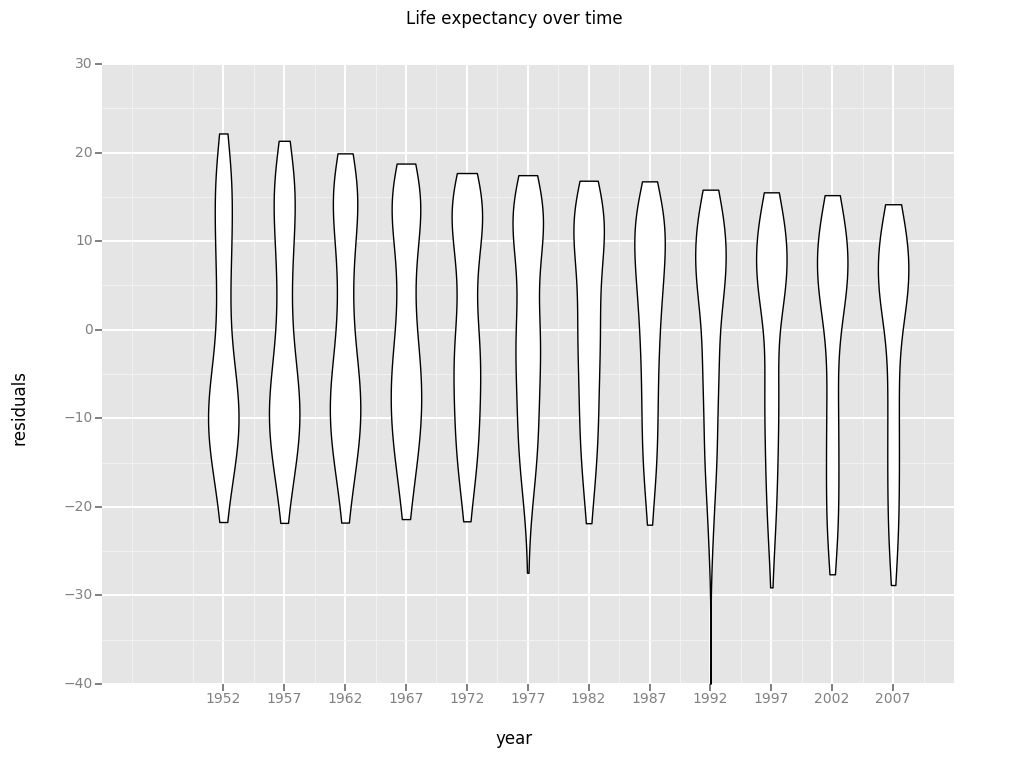

<ggplot: (83528511408)>


In [9]:
## Exercise 3
data = data.sort_values(by='year')
p = []
groups = data.groupby('year')

i = 0
for name, group in groups:
    j = 0
    for j in range(0, len(group)):
        p.append(float(lm.predict(x)[i]))
    i += 1
plt.show()
plt.close('all')
    
data['predict'] = p
data['r'] = data['lifeExp'] - data['predict']

g2 = ggplot(aes(x='year', y='r'), data=data) +\
    geom_violin() +\
    labs(title="Life expectancy over time",
         x = "year",
         y = "residuals")
print(g2)
## Question 8
#We are pretty close from the prediction we made in question 4. We forgot about the outliers in the later years that had a clear
#effect, specifically 1992, but beside that, the graphs have a slightly thinner shape and in later years, the bump
#gets close to 0, meaning that most countries are around the expected value

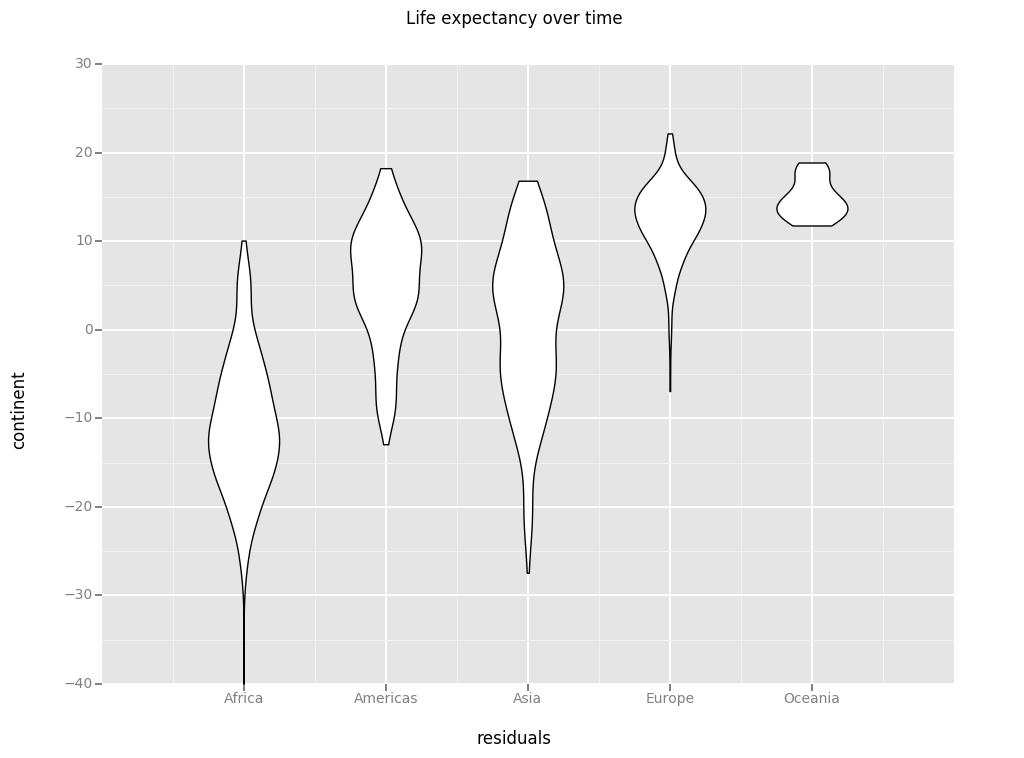

<ggplot: (83528506863)>


In [10]:
## Excercise 4
g3 = ggplot(aes(x='continent', y='r'), data=data) +\
    geom_violin() +\
    labs(title="Life expectancy over time",
         x = "residuals",
         y = "continent")
print(g3)

## Question 9 
#Yes, we can clearly see that Africa has the lowest life expectancy, Asia is around the average, with a bump above
#and a smaller bump below. Eurpoe and Oceania are both quite a bit above the expected values while the Americas are 
#mainly above (similar to Europe) but do have a longer tail with more values than Europe's lower end values.
#When performing a regression of life expectancy over time, there's more to the relationship than just
#the year affecting the life expectancy. There is a massive difference between Africa and Europe or Oceania that
#is worth ackowledging. Continent has a similar impact as year and we can see the dependence between model residul and continent.

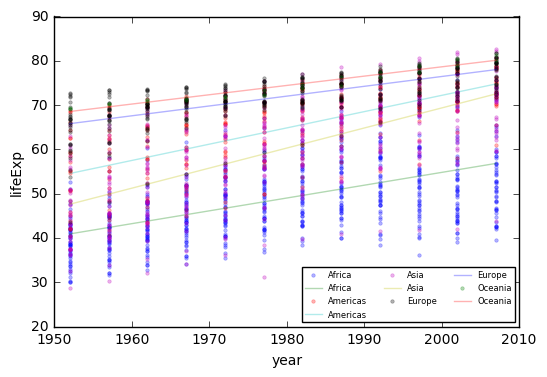

In [11]:
## Excercise 5
groups = data.groupby('continent')

fig, ax2 = plt.subplots()
ax2.set_ylabel('lifeExp')
ax2.set_xlabel('year')

for name, group in groups:
    x = group.year
    y = group.lifeExp
    x = x.values.reshape(-1,1)
    y = y.values.reshape(-1,1)
    lm = LinearRegression()
    lm.fit(x,y )
   
    ax2.plot(group.year,group.lifeExp, marker = '.',linestyle = 'None', alpha=.3,markersize='5', label=name)
    ax2.plot(group.year, lm.predict(x), markersize='5', alpha=.3,label=name)
ax2.legend(fontsize=6, loc='lower right', ncol=3, numpoints = 1)
plt.show()
plt.close('all')    
    
## Question 10
#Yes, the regression lines are all different. Africa's regression line has a small slope, while
#Oceania's is quite high. The different continents all have very different life expectancies, and the regression lines
#show just how much they differ, so we should definitely include an interaction term for continent.

In [12]:
## Exercise 6

mod = sm.ols('lifeExp ~ (continent*year)', data=data)


res = mod.fit()

print(res.summary())

#Question 11
#The value based on just the continent are all far from 0, while the value base on both year and continent are fairly close
#to 0, meaning year and continent provides a much better fit than just continent.  
#We have multiple very low p value(Africa and Asia) that are statistically signifiocant.

#Question 12
#The code below cacluate the estimate increase/year for each continent
param = res.params[5:]
base = param[0]
print("Africa :",base)
param = res.params[6:] + base
print(param)

                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     424.3
Date:                Sat, 22 Apr 2017   Prob (F-statistic):               0.00
Time:                        20:00:05   Log-Likelihood:                -5771.9
No. Observations:                1704   AIC:                         1.156e+04
Df Residuals:                    1694   BIC:                         1.162e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Intercept           

In [13]:
## Exercise 7
## The resule from the ols shows that 
#F-statistic from excerise 2 for only comparing year is 398.6 while it is 424.3 for comparing both continent and year

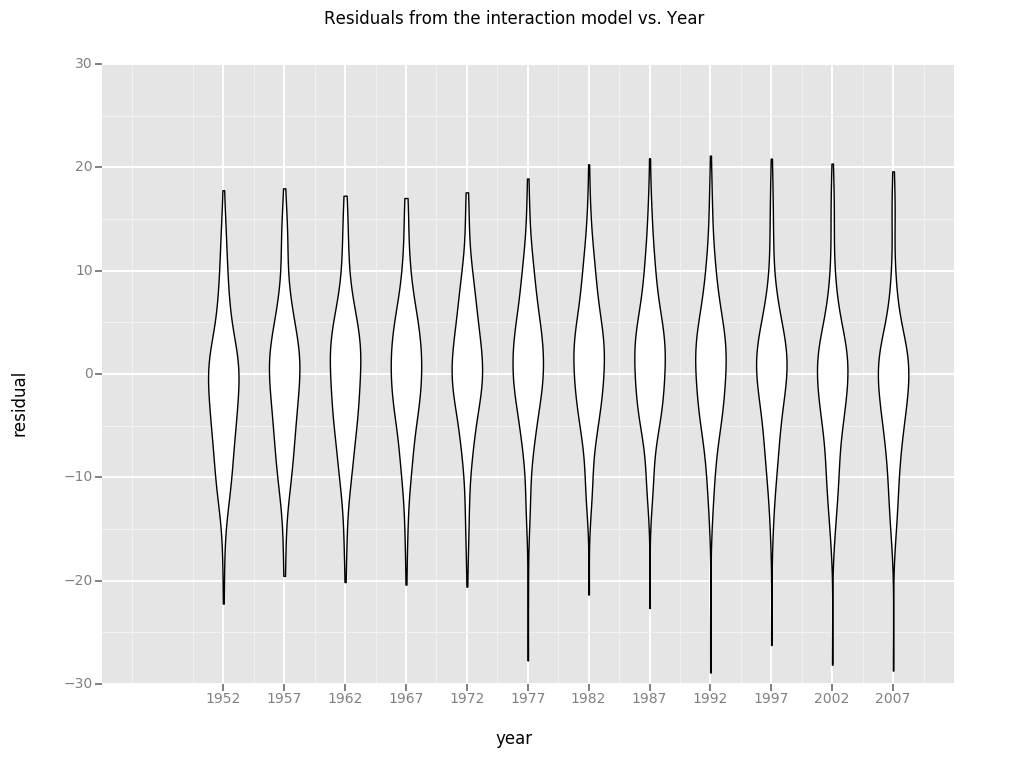

<ggplot: (-9223371953326136523)>


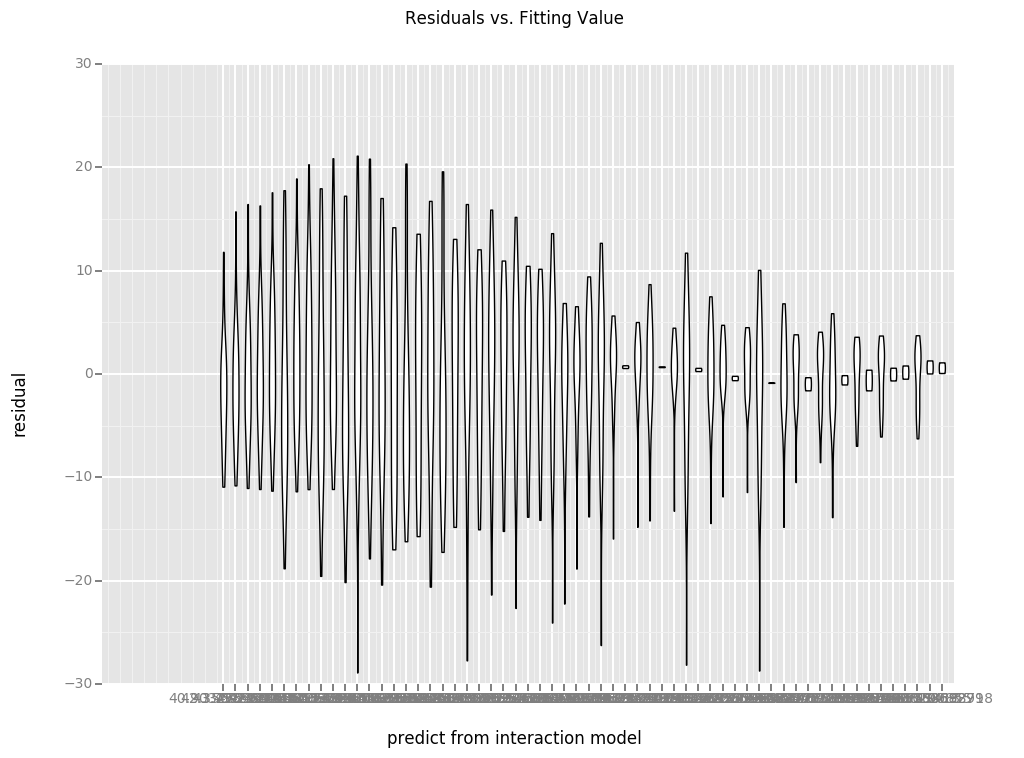

<ggplot: (-9223371953326138017)>


In [14]:
## Exercise 8
pred = res.predict(data)
data['pred'] = pred
data['r'] = data['lifeExp'] - data['pred']
g4 = ggplot(aes(x='year', y='r'), data=data) +\
    geom_violin() +\
    labs(title="Residuals from the interaction model vs. Year",
         x = "year",
         y = "residual")
print(g4)

g5 = ggplot(aes(x='pred', y='r'), data=data) +\
    geom_violin() +\
    labs(title="Residuals vs. Fitting Value",
         x = "predict from interaction model",
         y = "residual")
print(g5)


